# 책과 강의안의 코드를 활용하여 develop한 SVM 코드
- 데이터 분석의 전반적인 과정을 진행
- 다양한 방식의 EDA 수행
- GridSearch를 이용하여 최적의 파라미터 값 도출
- 혼동 행렬 시각화
- 예측값과 실제값의 분포 비교 시각화

In [1]:
# colab과 google drive 연결. colab을 열때마다 실행시켜줘야 함.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 데이터 전처리 및 SVM 모델링을 위한 라이브러리 모두 모아서 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
# 시각화 시 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [4]:
# 데이터 불러오기 - file_path 이용방법
# 강의안 기반 코드에서는 datasets에서 직접 불러오는 방법을 이용했으므로 이번에는 csv파일을 불러오는 방법을 사용해보기로 함.
file_path = '/content/drive/MyDrive/2024_MLDS/iris.csv'
data = pd.read_csv(file_path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. 데이터 탐색 및 시각화

### 1.1 데이터의 기본 정보 확인

In [5]:
# 데이터프레임의 모든 열 이름을 출력
# 데이터프레임에서 어떤 변수가 있는지 확인
print(data.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


    <iris 데이터셋 열 이름 설명>

    Sepal.Length: 꽃받침(Sepal)의 길이
    Sepal.Width: 꽃받침(Sepal)의 너비
    Petal.Length: 꽃잎(Petal)의 길이
    Petal.Width: 꽃잎(Petal)의 너비
    Species: 꽃의 종을 나타내는 범주형 변수

In [6]:
# 데이터프레임의 마지막 5개 행을 출력하여 데이터가 어떻게 생겼는지 확인
print(data.tail(5))

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [7]:
# 데이터프레임의 기본 정보를 출력
# 각 열의 데이터 타입, 전체 열 수, 결측값 유무 등을 확인할 수 있음
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
# 각 열의 데이터 타입을 출력
# 숫자형(int, float)인지, 문자열형(object)인지 등을 확인
print(data.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


In [9]:
# 각 열에 존재하는 결측값(null)의 개수를 출력
# 결측값이 있는지 확인하고, 결측값 처리를 어떻게 할지 결정하는 데 유용
print(data.isnull().sum())

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


### 1.2 종속변수(Species)에 따른 분포 확인

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


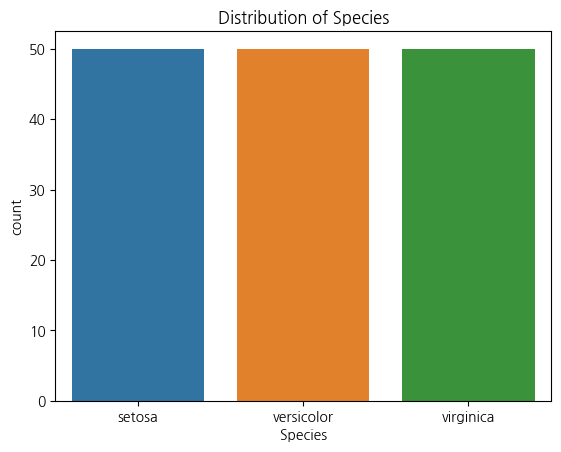

In [10]:
# 종속변수(Species)별 분포 확인
print(data['Species'].value_counts())

# 각 클래스(Species)의 분포를 시각화하여 데이터 불균형 여부 확인
sns.countplot(data=data, x='Species', hue='Species')
plt.title('Distribution of Species')
plt.show()

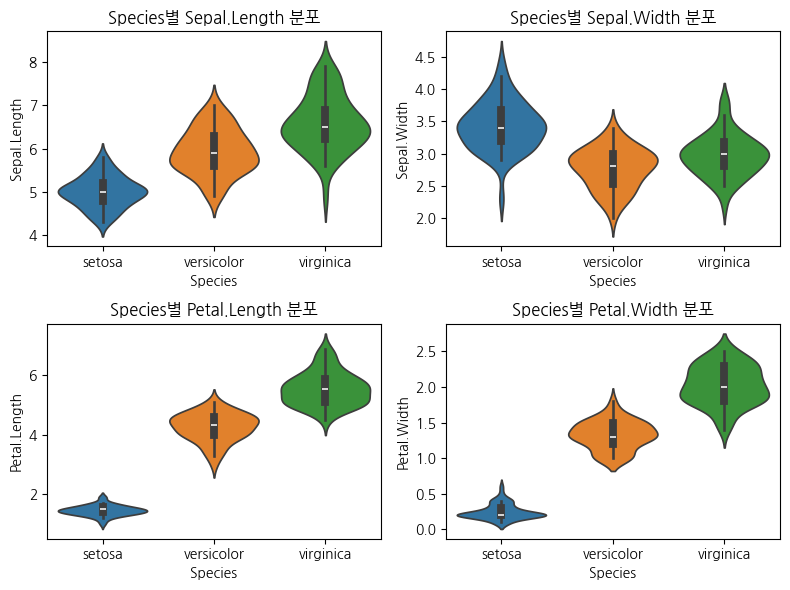

In [11]:
# 2x2 서브플롯을 생성
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# 각 서브플롯에 violin plot을 그리기
sns.violinplot(ax=axs[0, 0], x="Species", y="Sepal.Length", data=data, hue="Species")
axs[0, 0].set_title('Species별 Sepal.Length 분포') # Species별 Selal.Length 분포 확인

sns.violinplot(ax=axs[1, 0], x="Species", y="Petal.Length", data=data, hue="Species")
axs[1, 0].set_title('Species별 Petal.Length 분포') # Species별 Petal.Length 분포 확인

sns.violinplot(ax=axs[0, 1], x="Species", y="Sepal.Width", data=data, hue="Species")
axs[0, 1].set_title('Species별 Sepal.Width 분포') # Species별 Selal.Width 분포 확인

sns.violinplot(ax=axs[1, 1], x="Species", y="Petal.Width", data=data, hue="Species")
axs[1, 1].set_title('Species별 Petal.Width 분포') # Species별 Petal.Width 분포 확인

# 서브플롯 간의 간격을 자동으로 조정
plt.tight_layout()

# 플롯을 화면에 출력
plt.show()

    - 꽃받침 길이가 가장 짧은 종은 setosa 종이다.
    - virginica종의 꽃받침 길이는 다른 종에 비해 상대적으로 넓은 값으로 분포한다.

    - setosa종의 꽃받침 너비는 다른 종에 비해 상대적으로 넓은 값으로 분포한다.
    - versicolor와 virginica 종의 꽃받침 너비 간에는 큰 차이가 없다.

    - setasa종은 꽃잎 길이와 너비가 다른 종에 비해 매우 짧다.
    - virginica종이 꽃잎 길이와 너비가 가장 길고 넓다.



### 1.3 변수 간 상관관계 확인

<Figure size 800x600 with 0 Axes>

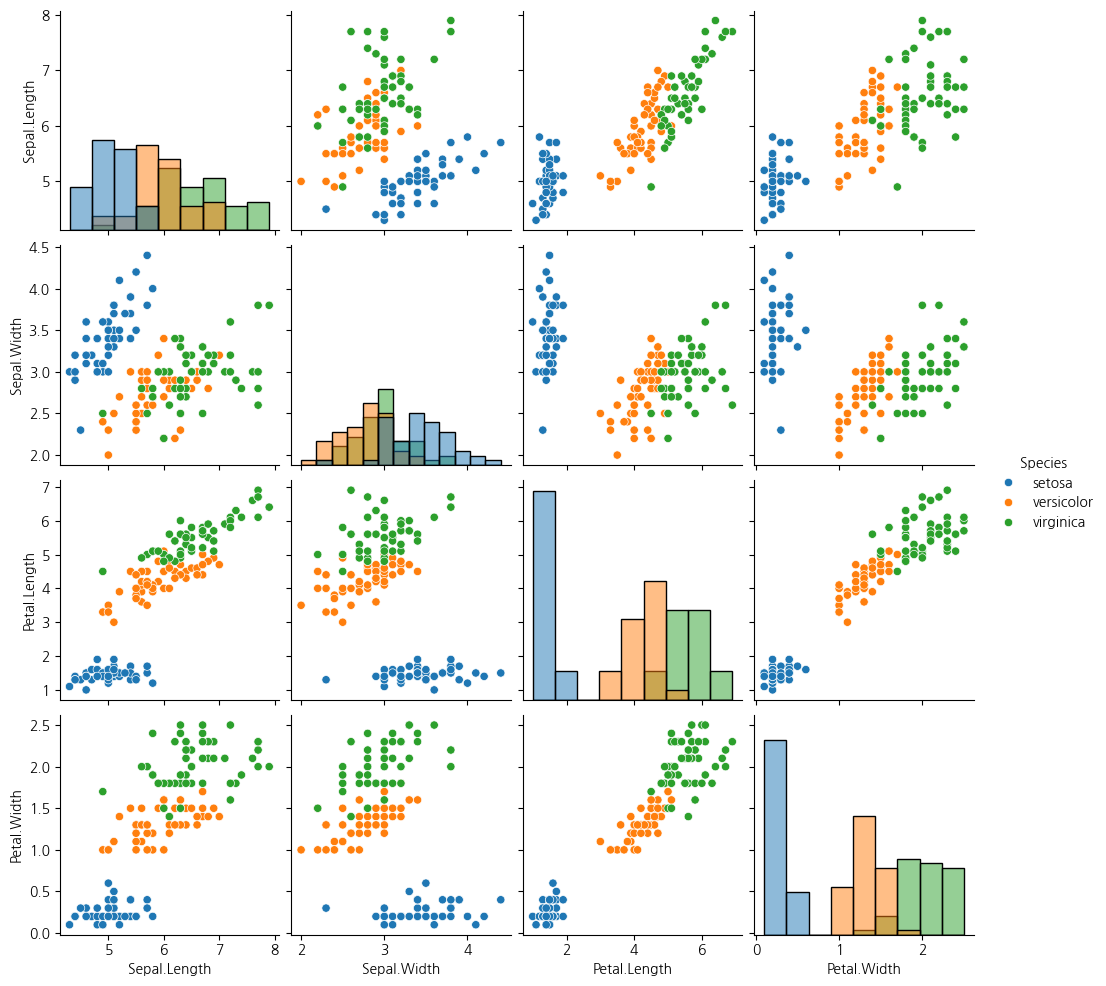

In [12]:
# 변수 간의 관계를 시각적으로 탐색하기 위해 pairplot을 사용 (Species에 따라 구분)
plt.figure(figsize=(8, 6))
sns.pairplot(data, hue='Species', diag_kind='hist')
plt.show()

    <산점도 확인>
    - Petal Length와 Petal Width 사이에는 강한 양의 상관관계가 있다.
        특히, versicolor와 virginica 종에서 뚜렷하게 나타난다.
    - Sepal Length와 Petal Length 사이에 양의 상관관계가 나타난다.
        특히, versicolor와 virginica 종에서 뚜렷하게 나타난다.

    <히스토그램 확인>
    - setosa종은 대부분의 특성에서 상대적으로 작은 값들을 갖는다. (Sepal Width 제외)
    - Petal Width와 Petal Length의 경우 virginica가 가장 큰 값을 갖는다.
    - Petal Length와 Petal Width만으로도 setosa와 나머지 두 종을 쉽게 분류할 수 있다.
    - 하지만 versicolor와 virginica는 겹치는 부분이 많기 때문에,
        이 두 종의 분류는 Petal Length와 Petal Width만으로는 상대적으로 어렵다.

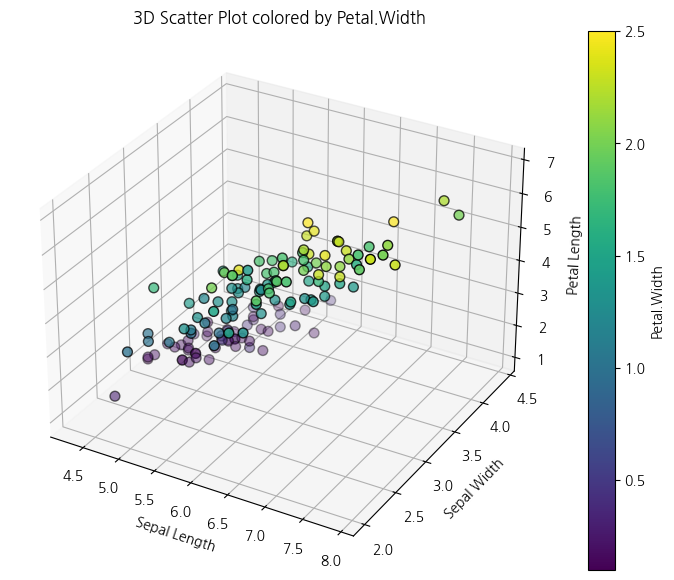

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# 3D 산점도 함수
def plot_3d_scatter(X, color_by):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # 산점도 그리기 (3개의 축에 세 변수 사용, 나머지 하나는 색상으로 표현)
    scatter = ax.scatter(X['Sepal.Length'], X['Sepal.Width'], X['Petal.Length'],
                         c=X[color_by], cmap='viridis', s=50, edgecolor='k')

    # 축 및 레이블 설정
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel('Petal Length')
    ax.set_title(f'3D Scatter Plot colored by {color_by}')

    # 컬러바 추가
    fig.colorbar(scatter, ax=ax, label=color_by)

    plt.show()

# 3D 산점도 호출 (sepal_length, sepal_width, petal_length 축, petal_width를 색상으로 사용)
plot_3d_scatter(data, color_by='Petal.Width')


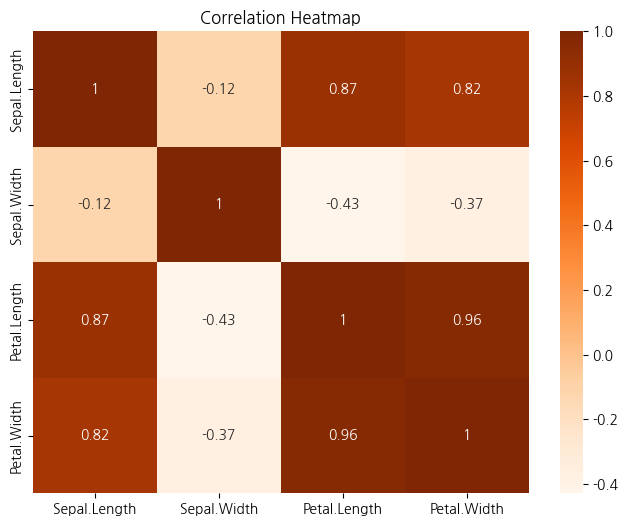

In [14]:
# 변수 간 상관관계를 시각화하여 변수 간의 선형적 관계 확인
plt.figure(figsize=(8, 6))
# data.corr() 에서 'Species' 컬럼을 제외하고 계산
sns.heatmap(data.drop(columns=['Species']).corr(), annot=True, cmap='Oranges')
plt.title('Correlation Heatmap')
plt.show()

## 2. 파생변수 생성 (데이터 변형)
### 파생변수를 추가하는 이유:
- 비율이나 면적 같은 새로운 변수는 모델이 데이터를 더 잘 이해하고, 성능 향상을 유도할 수 있다.
- 예를 들어, 꽃잎의 길이와 너비 비율은 단일 값으로 이 특성들의 상호작용을 설명할 수 있다.


In [15]:
# Sepal 길이와 너비의 비율을 나타내는 변수 추가 (꽃받침의 종대 종 폭 비율)
data['Sepal_Ratio'] = data['Sepal.Length'] / data['Sepal.Width']

# Petal 길이와 너비의 비율을 나타내는 변수 추가 (꽃잎의 종대 종 폭 비율)
data['Petal_Ratio'] = data['Petal.Length'] / data['Petal.Width']

# 꽃받침의 면적을 계산하여 면적이 분류에 미치는 영향을 측정하기 위한 변수 추가
data['Sepal_Area'] = data['Sepal.Length'] * data['Sepal.Width']

# 꽃잎의 면적을 계산하여 면적이 분류에 미치는 영향을 측정하기 위한 변수 추가
data['Petal_Area'] = data['Petal.Length'] * data['Petal.Width']

# 파생변수 생성 후 데이터 확인
print(data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  Sepal_Ratio  \
0           5.1          3.5           1.4          0.2  setosa     1.457143   
1           4.9          3.0           1.4          0.2  setosa     1.633333   
2           4.7          3.2           1.3          0.2  setosa     1.468750   
3           4.6          3.1           1.5          0.2  setosa     1.483871   
4           5.0          3.6           1.4          0.2  setosa     1.388889   

   Petal_Ratio  Sepal_Area  Petal_Area  
0          7.0       17.85        0.28  
1          7.0       14.70        0.28  
2          6.5       15.04        0.26  
3          7.5       14.26        0.30  
4          7.0       18.00        0.28  


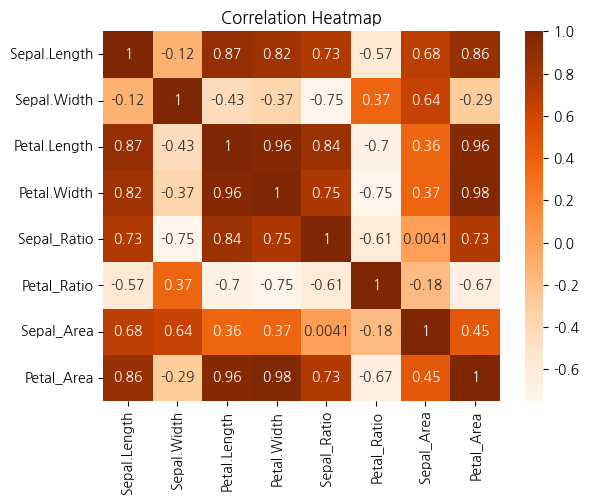

In [16]:
sns.heatmap(data.drop(columns=['Species']).corr(), annot=True, cmap='Oranges')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
import pandas as pd

# 'Species' 열을 제외하고 상관관계 계산
correlation_matrix = data.drop(columns=['Species']).corr()

# 상관계수가 0.7을 넘는 값만 필터링 (자기 자신과의 상관관계는 제외)
high_corr = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix != 1.0)]

# 결과 출력
high_corr

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal_Ratio,Petal_Ratio,Sepal_Area,Petal_Area
Sepal.Length,NaN,NaN,0.871754,0.817941,0.729917,NaN,NaN,0.857300
Sepal.Width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Petal.Length,0.871754,NaN,NaN,0.962865,0.837733,NaN,NaN,0.958422
Petal.Width,0.817941,NaN,0.962865,NaN,0.753767,NaN,NaN,0.980333
Sepal_Ratio,0.729917,NaN,0.837733,0.753767,NaN,NaN,NaN,0.727965
Petal_Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sepal_Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Petal_Area,0.857300,NaN,0.958422,0.980333,0.727965,NaN,NaN,NaN


In [18]:
# 상관계수가 0.7이 넘는 경우가 없도록 변수 제거
data.drop(columns=['Sepal.Length','Petal.Length','Petal.Width',"Petal_Area"], inplace=True)
data.head()

,Sepal.Width,Species,Sepal_Ratio,Petal_Ratio,Sepal_Area
0,3.5,setosa,1.457143,7.0,17.85
1,3.0,setosa,1.633333,7.0,14.70
2,3.2,setosa,1.468750,6.5,15.04
3,3.1,setosa,1.483871,7.5,14.26
4,3.6,setosa,1.388889,7.0,18.00


In [19]:
# 'Species' 열을 제외하고 상관관계 다시 계산
correlation_matrix = data.drop(columns=['Species']).corr()

# 상관계수가 0.7을 넘는 값만 필터링 (자기 자신과의 상관관계는 제외)
high_corr = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix != 1.0)]

# 결과 재출력
high_corr

,Sepal.Width,Sepal_Ratio,Petal_Ratio,Sepal_Area
Sepal.Width,NaN,NaN,NaN,NaN
Sepal_Ratio,NaN,NaN,NaN,NaN
Petal_Ratio,NaN,NaN,NaN,NaN
Sepal_Area,NaN,NaN,NaN,NaN


## 3. 데이터 전처리 및 학습 준비

In [20]:
# 종속변수 Species는 문자열 형태이므로 이를 숫자 값으로 변환
# 이를 통해 모델이 클래스 값을 학습할 수 있게 함
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

# Feature와 Label 분리 (Species는 종속변수, 나머지는 독립변수)
X = data.drop(columns=['Species'])
y = data['Species']

# 데이터를 학습용과 테스트용으로 분리 (80% 학습, 20% 테스트)
# 학습 데이터로 모델을 학습하고, 테스트 데이터로 성능 평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 학습 및 테스트 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


## 4. GridSearch를 통한 최적의 SVM 모델 찾기 (Linear & RBF Kernel)

In [21]:
# SVM 모델의 하이퍼파라미터를 찾기 위해 GridSearchCV 사용
# 파라미터 그리드 설정: C 값과 gamma 값의 조합을 통해 최적의 모델을 찾으려고 함. kernel 값에 대해서도 linear과 rbr 중 하나를 선택하도록 설정함.
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

# SVC 모델에 대해 GridSearchCV를 통해 최적의 파라미터를 찾음.
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력 (linear와 rbf 커널을 모두 테스트하여 최적값 찾음.)
print("Best Parameters:\n", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


## 5. 최적 모델로 테스트 데이터 예측 및 평가


In [23]:
# GridSearch를 통해 얻은 최적의 모델로 테스트 데이터에 대한 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 성능 평가 (정확도 및 클래스별 평가)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.54      0.70        13
           2       0.68      1.00      0.81        13

    accuracy                           0.87        45
   macro avg       0.89      0.85      0.84        45
weighted avg       0.91      0.87      0.86        45



## 6. 혼동행렬

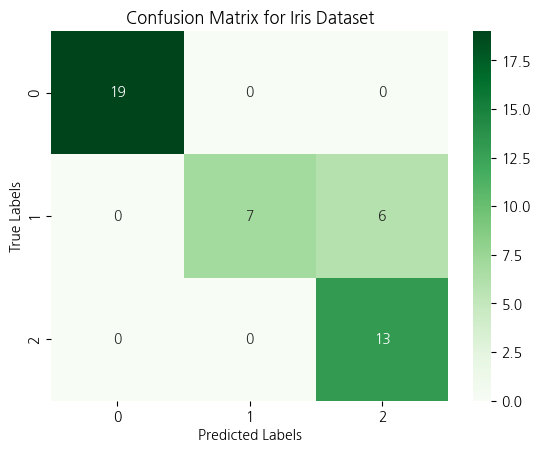

In [24]:
# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g', xticklabels=data['Species'].unique(), yticklabels=data['Species'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Iris Dataset')
plt.show()

## 7. 결과 시각화 - 실제값과 예측값의 분포 비교

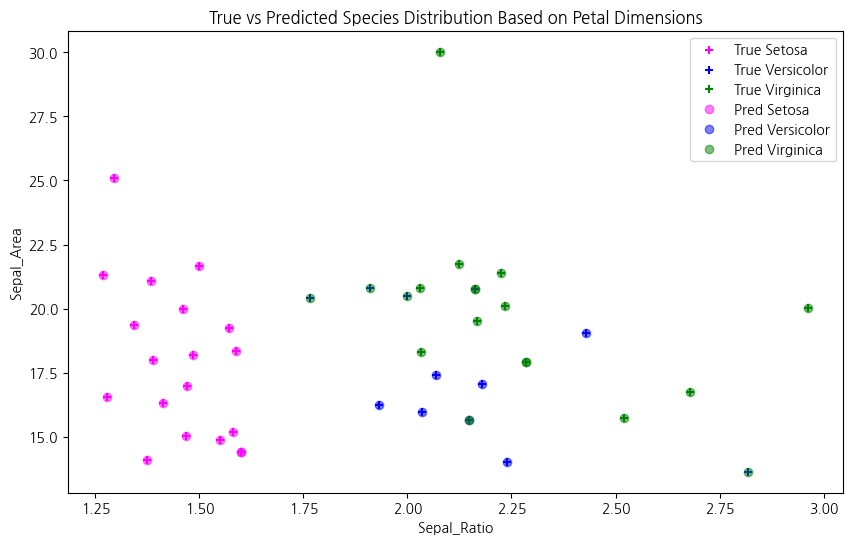

In [25]:
# Sepal_Ratio와 Sepal_Area를 기준으로 실제값과 예측값의 분포를 비교하는 시각화
plt.figure(figsize=(10, 6))

# 실제 데이터에서 setosa, versicolor, virginica 분리
df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['True Species'] = y_test
df_test['Predicted Species'] = y_pred

# 실제 값에 따른 꽃의 분포 (setosa, versicolor, virginica)
df_true_setosa = df_test[df_test['True Species'] == 0]
df_true_versicolor = df_test[df_test['True Species'] == 1]
df_true_virginica = df_test[df_test['True Species'] == 2]

# 예측 값에 따른 꽃의 분포
df_pred_setosa = df_test[df_test['Predicted Species'] == 0]
df_pred_versicolor = df_test[df_test['Predicted Species'] == 1]
df_pred_virginica = df_test[df_test['Predicted Species'] == 2]

# 실제 값에 따른 시각화 (실제 setosa, versicolor, virginica)
plt.scatter(df_true_setosa['Sepal_Ratio'], df_true_setosa['Sepal_Area'], color='magenta', marker='+', label='True Setosa')
plt.scatter(df_true_versicolor['Sepal_Ratio'], df_true_versicolor['Sepal_Area'], color='blue', marker='+', label='True Versicolor')
plt.scatter(df_true_virginica['Sepal_Ratio'], df_true_virginica['Sepal_Area'], color='green', marker='+', label='True Virginica')

# 예측 값에 따른 시각화 (예측된 setosa, versicolor, virginica)
plt.scatter(df_pred_setosa['Sepal_Ratio'], df_pred_setosa['Sepal_Area'], color='magenta', marker='o', label='Pred Setosa', alpha=0.5)
plt.scatter(df_pred_versicolor['Sepal_Ratio'], df_pred_versicolor['Sepal_Area'], color='blue', marker='o', label='Pred Versicolor', alpha=0.5)
plt.scatter(df_pred_virginica['Sepal_Ratio'], df_pred_virginica['Sepal_Area'], color='green', marker='o', label='Pred Virginica', alpha=0.5)

# 그래프 제목 및 축 라벨 설정
plt.xlabel('Sepal_Ratio')
plt.ylabel('Sepal_Area')
plt.title('True vs Predicted Species Distribution Based on Petal Dimensions')

# 범례 추가
plt.legend()

# 시각화 출력
plt.show()


### 참고) 결정 경계 시각화를 위한 추가적인 모델 학습

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


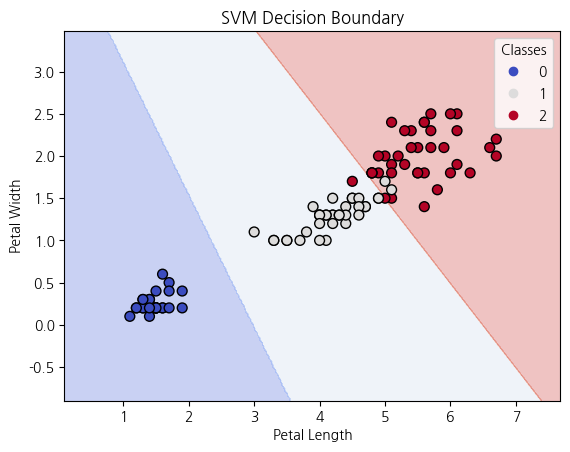

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Iris 데이터셋 로드
iris = sns.load_dataset('iris')

# 'species' 범주형 데이터를 숫자로 변환
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris['species'])

# 두 개의 특성만 선택 (petal_length와 petal_width)
X = iris[['petal_length', 'petal_width']]

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 학습 (linear kernel 사용)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 시각화를 위한 결정 경계 그리기
def plot_decision_boundary(X, y, model):
    # X의 최소값과 최대값으로 메쉬 그리드 생성
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 예측 수행
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # 실제 데이터 점 그리기
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='coolwarm', edgecolors='k')

    # 축 및 레이블 설정
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('SVM Decision Boundary')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)
